In [1]:
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
import json
import pickle
import numpy as np
import tensorflow as tf
import random
from transformers import TFBertModel, BertTokenizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from keras.utils import plot_model
import pydot_ng as pydot
import graphviz

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("cahya/bert-base-indonesian-522M")
bert_model = TFBertModel.from_pretrained("cahya/bert-base-indonesian-522M")

#Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

Some layers from the model checkpoint at cahya/bert-base-indonesian-522M were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at cahya/bert-base-indonesian-522M.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [3]:
#Define word, classes, documents and ignore words to a list
words = []
classes = []
documents = []
ignore_words = ['?', '!']

#Load data from .json file
data_file = open('foodricionchatbotdataset/intents.json').read()
intents = json.loads(data_file)

In [4]:
# Preprocess data
for intent in intents['intents']:
    for pattern in intent['patterns']:
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        documents.append((w, intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [5]:
print(len(words), "Tokenize word\n", words, "\n")

9187 Tokenize word
 ['Halo', 'Hai', 'Haii', 'Haiii', 'Haiiii', 'Selamat', 'pagi', 'Selamat', 'siang', 'Selamat', 'sore', 'Selamat', 'malam', 'Apa', 'kabar', '?', 'Tolong', 'bantu', 'saya', 'mau', 'tanya', 'Hay', 'Hy', 'Hallo', 'Hey', 'Hola', 'Hello', 'Hai', 'p', 'hai', 'halo', 'hay', 'haii', 'mikum', 'assamualaikaum', 'hi', 'dah', 'sampai', 'jumpa', 'bye', 'bye', 'Sampai', 'nanti', 'Selamat', 'tinggal', 'Saya', 'pergi', 'Bye', 'bicara', 'nanti', 'saya', 'harus', 'pergi', 'terima', 'kasih', 'terima', 'kasih', 'makasih', 'ya', 'makasih', 'makasih', 'jawabanya', 'mantap', 'tepat', 'siap', 'matur', 'nuwun', 'terima', 'kasih', 'banyak', 'Terima', 'kasih', 'Thanks', 'Thank', 'you', 'Itu', 'membantu', 'Luar', 'biasa', ',', 'terima', 'kasih', 'Terima', 'kasih', 'telah', 'membantu', 'saya', 'Ok', ',', 'terima', 'kasih', 'makasih', 'terimakasih', 'tq', 'ty', 'Apa', 'yang', 'bisa', 'kamu', 'lakukan', '?', 'Bisa', 'apa', 'saja', '?', 'Kamu', 'bisa', 'bantu', 'dengan', 'apa', 'saja', '?', 'Apa', 's

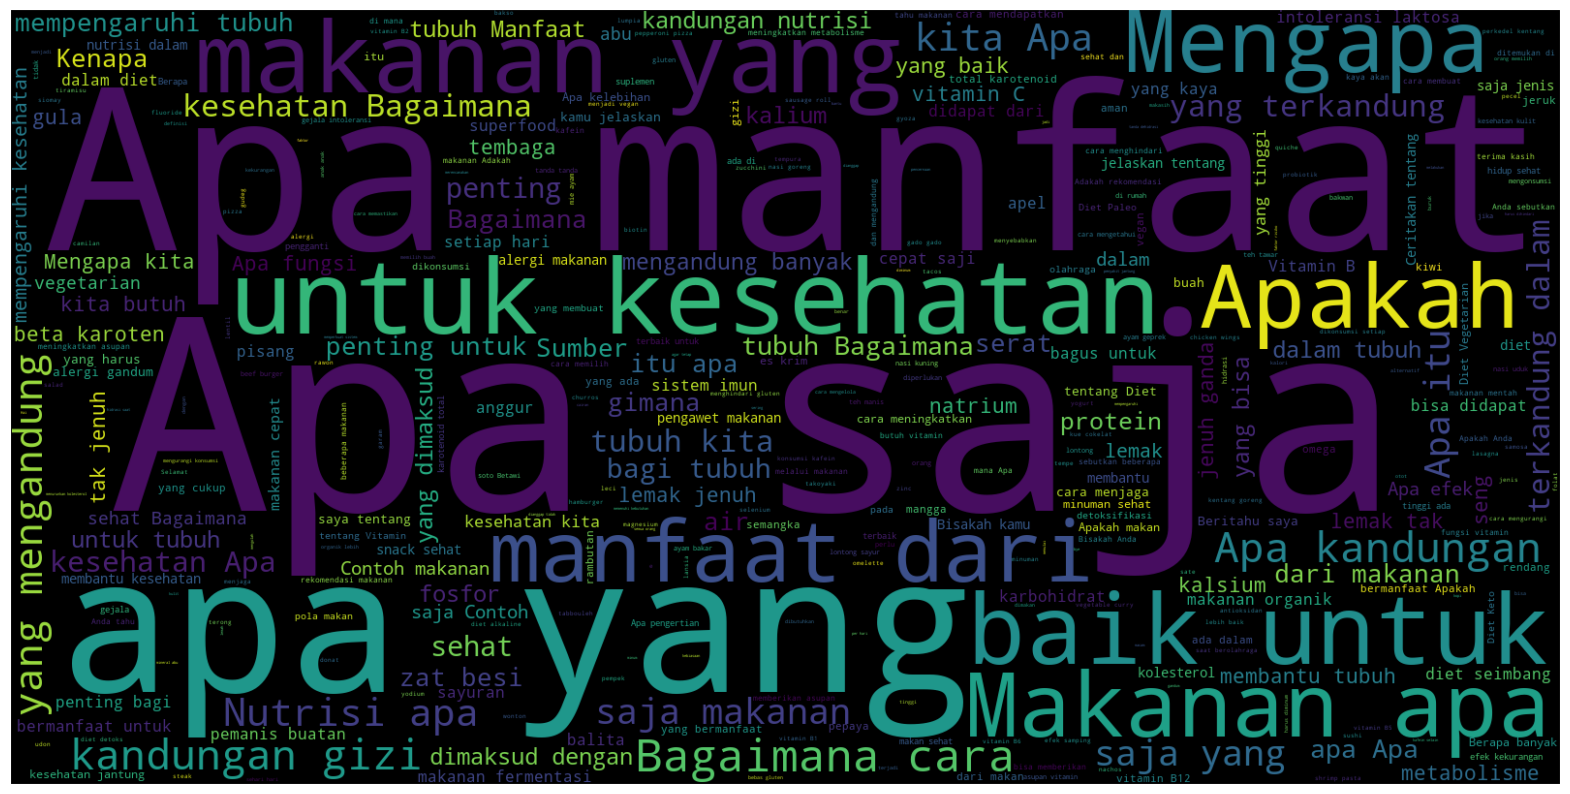

In [6]:
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(' '.join(words))
plt.imshow(wc, interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.show()

In [31]:
# Lemmatize word and stored it in a list
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))
# stored classes in a list
classes = sorted(list(set(classes)))

#Dump it to pickle to use the chat bot
pickle.dump(words, open('words_newpatterns.pkl', 'wb'))
pickle.dump(classes, open('classes_newpatterns.pkl', 'wb'))

In [8]:
#checking documents
print(len(documents), "documents\n", documents, "\n")

1543 documents
 [([], 'notfound'), ([], 'notfound'), ([], 'notfound'), ([], 'notfound'), ([], 'notfound'), (['Halo'], 'sapaan'), (['Hai'], 'sapaan'), (['Haii'], 'sapaan'), (['Haiii'], 'sapaan'), (['Haiiii'], 'sapaan'), (['Selamat', 'pagi'], 'sapaan'), (['Selamat', 'siang'], 'sapaan'), (['Selamat', 'sore'], 'sapaan'), (['Selamat', 'malam'], 'sapaan'), (['Apa', 'kabar', '?'], 'sapaan'), (['Tolong', 'bantu', 'saya'], 'sapaan'), (['mau', 'tanya'], 'sapaan'), (['Hay'], 'sapaan'), (['Hy'], 'sapaan'), (['Hallo'], 'sapaan'), (['Hey'], 'sapaan'), (['Hola'], 'sapaan'), (['Hello'], 'sapaan'), (['Hai'], 'sapaan'), (['p'], 'sapaan'), (['hai'], 'sapaan'), (['halo'], 'sapaan'), (['hay'], 'sapaan'), (['haii'], 'sapaan'), (['mikum'], 'sapaan'), (['assamualaikaum'], 'sapaan'), (['hi'], 'sapaan'), (['dah'], 'penyudahan'), (['sampai', 'jumpa'], 'penyudahan'), (['bye', 'bye'], 'penyudahan'), (['Sampai', 'nanti'], 'penyudahan'), (['Selamat', 'tinggal'], 'penyudahan'), (['Saya', 'pergi'], 'penyudahan'), (['B

In [9]:
#Checking number of classes and what's in it
print(len(classes), "classes\n", classes, "\n")

206 classes
 ['alergi_gandum', 'alergi_makanan', 'ash', 'asupan_gizi', 'bCarotene', 'buah-buahan', 'camilan_sehat', 'copper', 'detoksifikasi', 'diet', 'diet Paleo', 'diet keto', 'diet vegetarian', 'diet_alkaline', 'diet_detoks', 'diet_seimbang', 'gizi_balita', 'gizi_lansia', 'gluten', 'hidrasi_olahraga', 'hidratasi', 'hidup_sehat', 'intoleransi_laktosa', 'iron', 'kafein', 'kalsium', 'karbohidrat', 'kesehatan_jantung', 'kolesterol', 'kulit_sehat', 'lemak', 'makanan_cepat_saji', 'makanan_fermentasi', 'makanan_mentah', 'makanan_organik', 'makanan_sehat', 'makanan_tinggi_garam', 'manfaat ash', 'manfaat bCarotene', 'manfaat copper', 'manfaat dietaryFiber', 'manfaat iron', 'manfaat lemak', 'manfaat phosphorus', 'manfaat polyunsaturatedFat', 'manfaat potassium', 'manfaat saturatedFat', 'manfaat sodium', 'manfaat sugar', 'manfaat totalCarotene', 'manfaat water', 'manfaat zinc', 'manfaat_air', 'manfaat_biotin', 'manfaat_buah_anggur', 'manfaat_buah_apel', 'manfaat_buah_jeruk', 'manfaat_buah_kiwi

In [10]:
#print uniques words stored in the words list
print(len(words), "unique lemmatized words\n", words, "\n")

494 unique lemmatized words
 [',', '.', 'a', 'abu', 'ada', 'adakah', 'agar', 'air', 'akan', 'alami', 'alergi', 'alkaline', 'alternatif', 'aman', 'anak-anak', 'anda', 'anggur', 'antara', 'antioksidan', 'apa', 'apakah', 'apel', 'assamualaikaum', 'asupan', 'ayam', 'b', 'b1', 'b12', 'b2', 'b5', 'b6', 'bagaimana', 'bagi', 'bagus', 'bahaya', 'baik', 'bakar', 'bakso', 'bakwan', 'balita', 'bantu', 'banyak', 'baru', 'bata', 'bebas', 'beberapa', 'beda', 'beef', 'bekerja', 'benar', 'benar-benar', 'berapa', 'berat', 'berbahaya', 'bergizi', 'beritahu', 'bermanfaat', 'berolahraga', 'berperan', 'besi', 'beta-karoten', 'betawi', 'biar', 'biasa', 'bicara', 'bikin', 'biotin', 'bisa', 'bisakah', 'buah', 'buah-buahan', 'buatan', 'burger', 'buruk', 'butuh', 'butuhkan', 'bye', 'c', 'cairan', 'camilan', 'cara', 'cepat', 'ceritakan', 'chicken', 'churros', 'ciri-ciri', 'cocok', 'cokelat', 'contoh', 'cukup', 'curry', 'daging', 'dah', 'dalam', 'dampak', 'dan', 'dapat', 'dari', 'definisi', 'dehidrasi', 'dengan', 

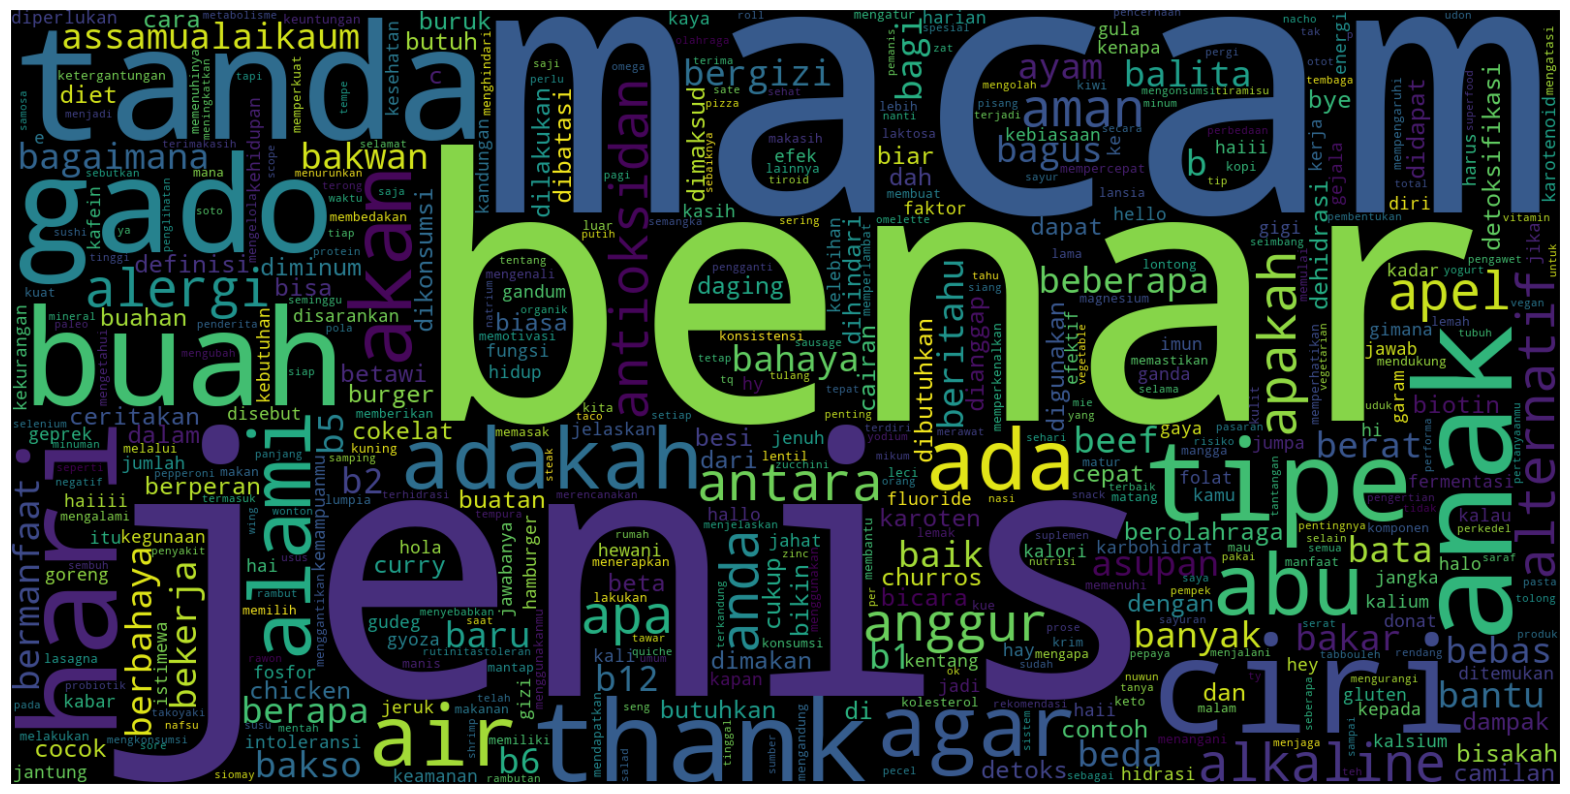

In [11]:
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(' '.join(words))
plt.imshow(wc, interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.show()

In [12]:
# Generate BERT embeddings for each pattern
def get_bert_embeddings(texts):
    inputs = tokenizer(texts, return_tensors='tf', padding=True, truncation=True)
    outputs = bert_model(**inputs)
    last_hidden_state = outputs.last_hidden_state
    # Compute the mean of the last hidden state across the sequence length
    mean_embeddings = tf.reduce_mean(last_hidden_state, axis=1)
    return mean_embeddings.numpy()

In [13]:
training = []
output_empty = [0] * len(classes)

for doc in documents:
    pattern_words = ' '.join(doc[0])
    bag = get_bert_embeddings([pattern_words])[0]
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])

random.shuffle(training)
training = np.array(training, dtype="object")
train_x = np.array(training[:, 0].tolist())
train_y = np.array(training[:, 1].tolist())

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [14]:
print("Bert embeddings\n", train_x, "\n")

Bert embeddings
 [[-0.5343019   0.07024857 -0.21060538 ...  0.73975885 -0.48090124
  -0.19745162]
 [ 0.09925725  0.42928305  0.5368606  ...  0.6487361  -0.47211432
  -0.43928957]
 [-1.3571521   0.7307154   0.16549613 ...  0.9906928   0.33165485
  -0.69398934]
 ...
 [-0.9399018   0.9332448  -0.44464892 ...  0.34909418 -0.35647032
   0.05132585]
 [-0.20712276  0.22302215 -0.02855922 ...  0.7627794  -0.37176508
  -0.1610829 ]
 [-0.37957156  0.52937275 -0.44212654 ...  0.8445216  -0.8726372
  -0.44650462]] 



In [15]:
import numpy as np

def cosine_similarity(v1, v2):
    v1_norm = np.linalg.norm(v1)
    v2_norm = np.linalg.norm(v2)
    if v1_norm == 0 or v2_norm == 0:
        return 0
    return np.dot(v1, v2) / (v1_norm * v2_norm)

# Example: Calculate cosine similarity between the first and second word vectors
similarity = cosine_similarity(train_x[0], train_x[1])
print("Cosine Similarity:", similarity)

Cosine Similarity: 0.6266874


In [16]:
import numpy as np

def cosine_similarity(v1, v2):
    v1_norm = np.linalg.norm(v1)
    v2_norm = np.linalg.norm(v2)
    if v1_norm == 0 or v2_norm == 0:
        return 0
    return np.dot(v1, v2) / (v1_norm * v2_norm)

# Example: Calculate cosine similarity between the first and second word vectors
similarity = cosine_similarity(train_y[0], train_y[1])
print("Cosine Similarity:", similarity)

Cosine Similarity: 0.0


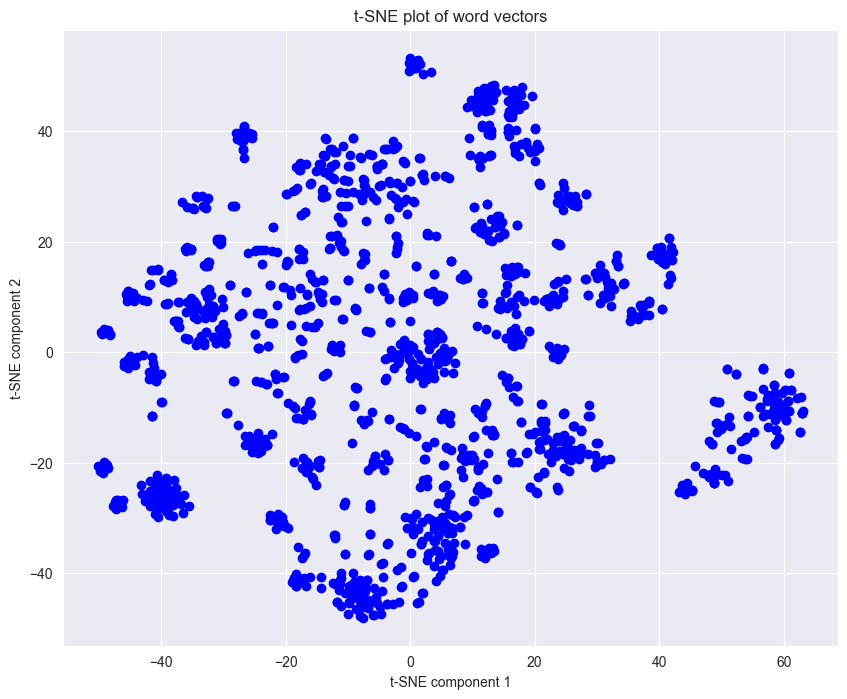

In [17]:
from sklearn.manifold import TSNE

# Step 2: Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)  # For 2D plot, use n_components=3 for 3D
word_vectors_2d = tsne.fit_transform(train_x)

# Step 3: Plot the t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], c='blue', marker='o')

# Optional: If you have labels for your word vectors, you can annotate the plot
# labels = ['word1', 'word2', 'word3', ...]  # Replace with your actual labels
# for i, label in enumerate(labels):
#     plt.annotate(label, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

plt.title('t-SNE plot of word vectors')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()

In [18]:
# Reshape train_x to be 3D for LSTM input
train_x = np.expand_dims(train_x, axis=1)

In [19]:
# Build the model with LSTM layers
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(train_y[0]), activation='softmax')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            459264    
                                                                 
 dropout_37 (Dropout)        (None, 1, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_38 (Dropout)        (None, 64)                0         
                                                                 
 dense (Dense)               (None, 206)               13390     
                                                                 
Total params: 522062 (1.99 MB)
Trainable params: 522062 (1.99 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


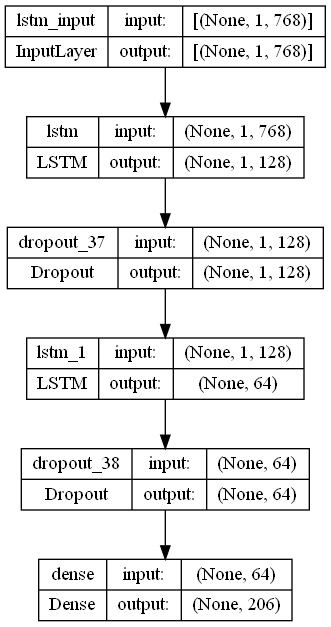

In [21]:
plot_model(model=model, to_file='model_chatbot_plot.png', show_shapes=True, show_layer_names=True)

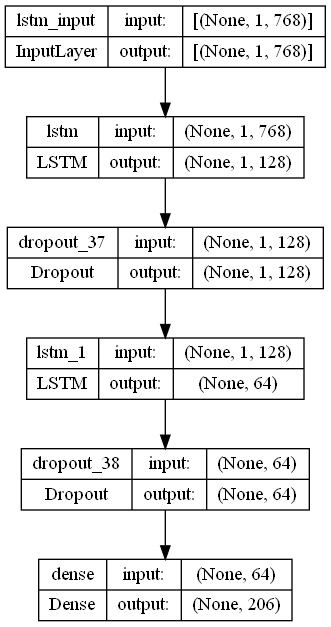

In [22]:
# from tensorflow.keras.utils import plot_model
from keras.utils import plot_model
# Visualisasikan model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [23]:
# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_x, train_y, epochs=500, batch_size=32, verbose=1)

Epoch 1/500
49/49 [==============================] - 4s 8ms/step - loss: 5.3087 - accuracy: 0.0259
Epoch 2/500
49/49 [==============================] - 0s 9ms/step - loss: 5.1801 - accuracy: 0.0590
Epoch 3/500
49/49 [==============================] - 0s 8ms/step - loss: 4.8949 - accuracy: 0.0843
Epoch 4/500
49/49 [==============================] - 0s 9ms/step - loss: 4.5168 - accuracy: 0.1413
Epoch 5/500
49/49 [==============================] - 0s 9ms/step - loss: 4.1159 - accuracy: 0.2139
Epoch 6/500
49/49 [==============================] - 0s 8ms/step - loss: 3.7791 - accuracy: 0.2612
Epoch 7/500
49/49 [==============================] - 0s 8ms/step - loss: 3.4629 - accuracy: 0.3117
Epoch 8/500
49/49 [==============================] - 0s 9ms/step - loss: 3.2025 - accuracy: 0.3532
Epoch 9/500
49/49 [==============================] - 1s 16ms/step - loss: 2.9574 - accuracy: 0.3927
Epoch 10/500
49/49 [==============================] - 0s 10ms/step - loss: 2.7528 - accuracy: 0.4478
Epoch 1

In [30]:
model.save('chatbot_v2_newpatterns.h5')

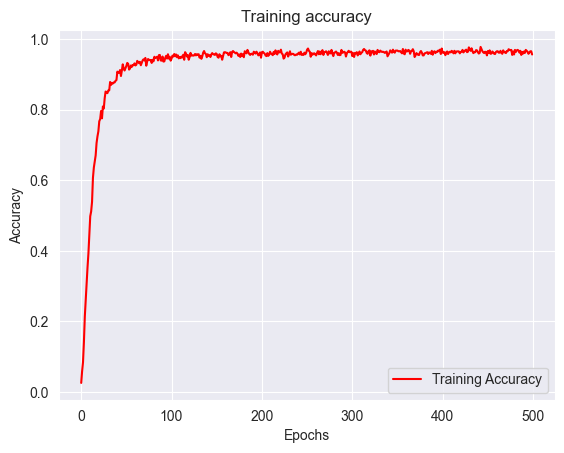

<Figure size 640x480 with 0 Axes>

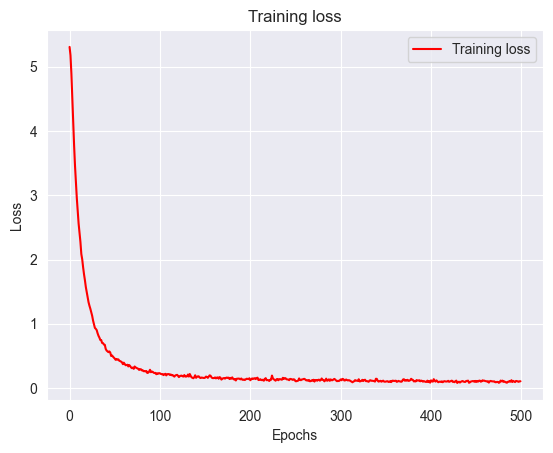

<Figure size 640x480 with 0 Axes>

In [24]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))

# Membuat grafik plot untuk accuracy
plt.plot(epochs, acc, 'r', label ='Training Accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

# Membuat grafik plot untuk loss
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [25]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the test set
predictions = model.predict(train_x)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(train_y, axis=1)

# Compute metrics
report = classification_report(true_classes, predicted_classes, target_names=classes)
accuracy = accuracy_score(true_classes, predicted_classes)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

49/49 [==============================] - 1s 2ms/step
Accuracy: 0.9799092676604018
Classification Report:
                                  precision    recall  f1-score   support

                   alergi_gandum       1.00      1.00      1.00        15
                  alergi_makanan       1.00      1.00      1.00        15
                             ash       1.00      0.90      0.95        10
                     asupan_gizi       1.00      1.00      1.00         5
                       bCarotene       1.00      0.80      0.89        10
                     buah-buahan       1.00      1.00      1.00        15
                   camilan_sehat       1.00      1.00      1.00         5
                          copper       1.00      0.80      0.89        10
                   detoksifikasi       1.00      1.00      1.00         8
                            diet       1.00      1.00      1.00         9
                      diet Paleo       1.00      1.00      1.00         9
      

In [26]:
model.evaluate(train_x, train_y)

49/49 [==============================] - 1s 3ms/step - loss: 0.0326 - accuracy: 0.9799


[0.0326145775616169, 0.9799092411994934]

In [27]:
results = model.evaluate(train_x, train_y, verbose=1)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

49/49 [==============================] - 0s 2ms/step - loss: 0.0326 - accuracy: 0.9799
    Test Loss: 0.03261
Test Accuracy: 97.99%


10/10 [==============================] - 0s 2ms/step


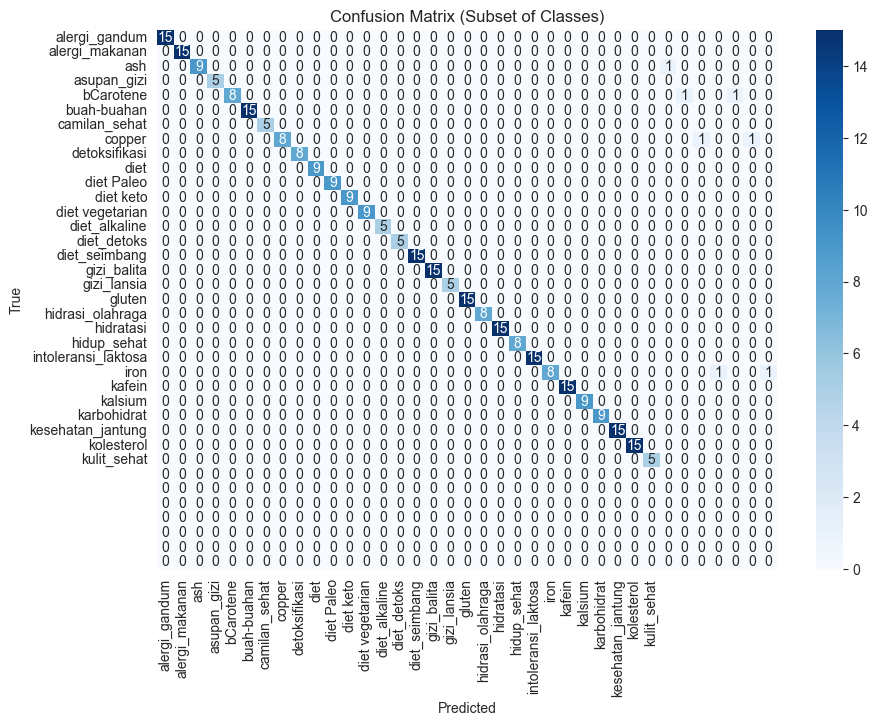

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the subset of classes to use
subset_classes = classes[:30]  # Use the first 30 classes (adjust as needed)
subset_indices = [classes.index(cls) for cls in subset_classes]

# Filter train_x and train_y to include only the subset of classes
subset_train_x = [x for i, x in enumerate(train_x) if np.argmax(train_y[i]) in subset_indices]
subset_train_y = [y for i, y in enumerate(train_y) if np.argmax(y) in subset_indices]

# Convert lists to numpy arrays
subset_train_x = np.array(subset_train_x)
subset_train_y = np.array(subset_train_y)

# Make predictions on the filtered training set
conf_predictions = model.predict(subset_train_x)
conf_predictions = np.argmax(conf_predictions, axis=1)  # Convert predictions to class indices
conf_y_true = np.argmax(subset_train_y, axis=1)  # Convert true labels to class indices

# Compute confusion matrix
conf_matrix = confusion_matrix(conf_y_true, conf_predictions)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=subset_classes, yticklabels=subset_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Subset of Classes)')
plt.show()

7/7 [==============================] - 0s 2ms/step


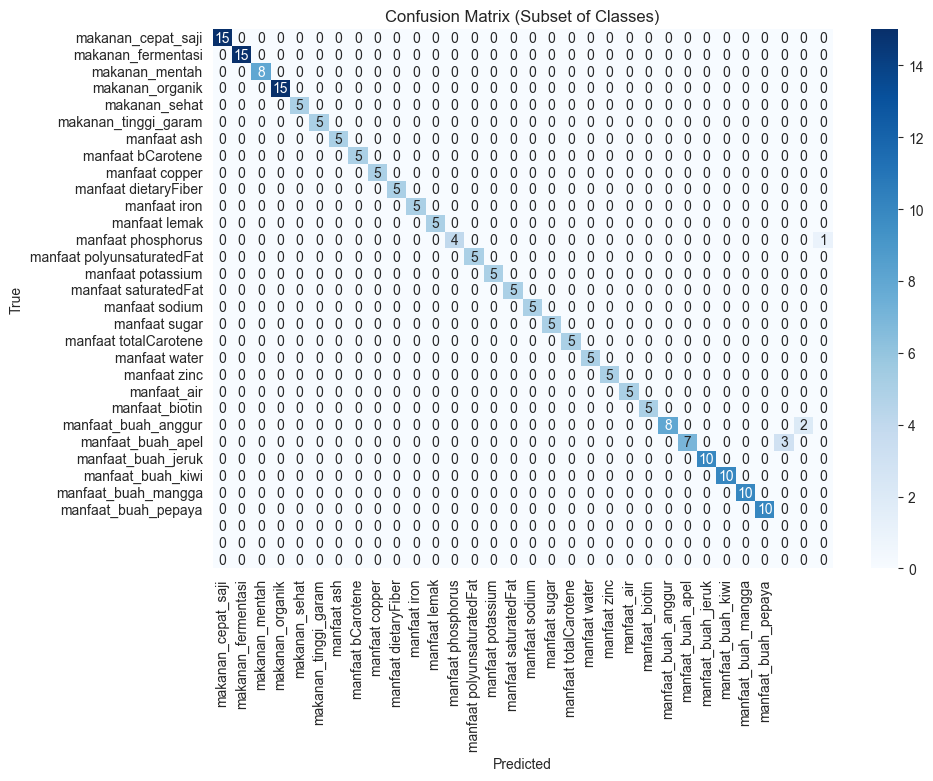

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the subset of classes to use
subset_classes = classes[31:60]  # Use the first 30 classes (adjust as needed)
subset_indices = [classes.index(cls) for cls in subset_classes]

# Filter train_x and train_y to include only the subset of classes
subset_train_x = [x for i, x in enumerate(train_x) if np.argmax(train_y[i]) in subset_indices]
subset_train_y = [y for i, y in enumerate(train_y) if np.argmax(y) in subset_indices]

# Convert lists to numpy arrays
subset_train_x = np.array(subset_train_x)
subset_train_y = np.array(subset_train_y)

# Make predictions on the filtered training set
conf_predictions = model.predict(subset_train_x)
conf_predictions = np.argmax(conf_predictions, axis=1)  # Convert predictions to class indices
conf_y_true = np.argmax(subset_train_y, axis=1)  # Convert true labels to class indices

# Compute confusion matrix
conf_matrix = confusion_matrix(conf_y_true, conf_predictions)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=subset_classes, yticklabels=subset_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Subset of Classes)')
plt.show()